In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving hotel_bookings.csv to hotel_bookings.csv


In [ ]:
hotel_df=pd.read_csv('hotel_bookings.csv')
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
hotel_df['company'] = hotel_df['company'].fillna(0)
hotel_df['agent'] = hotel_df['agent'].fillna(0)
hotel_df['country'] = hotel_df['country'].fillna('Unknown')
hotel_df['children'] = hotel_df['children'].fillna(0)

In [ ]:
hotel_df.isnull().sum()



,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
numeric_cols = hotel_df.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
from sklearn.preprocessing  import  StandardScaler
scaler=StandardScaler()
numeric_cols = numeric_cols.drop('adr','is_canceled')
hotel_df[numeric_cols] = scaler.fit_transform(hotel_df[numeric_cols])

In [ ]:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,-0.76704,2.227051,-1.634768,July,-0.012141,-1.685297,-0.92889,-1.310240,0.247897,...,No Deposit,-0.698406,-0.199748,-0.131924,Transient,0.0,-0.254873,-0.720694,Check-Out,2015-07-01
1,Resort Hotel,-0.76704,5.923385,-1.634768,July,-0.012141,-1.685297,-0.92889,-1.310240,0.247897,...,No Deposit,-0.698406,-0.199748,-0.131924,Transient,0.0,-0.254873,-0.720694,Check-Out,2015-07-01
2,Resort Hotel,-0.76704,-0.907814,-1.634768,July,-0.012141,-1.685297,-0.92889,-0.786207,-1.478447,...,No Deposit,-0.698406,-0.199748,-0.131924,Transient,75.0,-0.254873,-0.720694,Check-Out,2015-07-02
3,Resort Hotel,-0.76704,-0.851667,-1.634768,July,-0.012141,-1.685297,-0.92889,-0.786207,-1.478447,...,No Deposit,2.138963,-0.199748,-0.131924,Transient,75.0,-0.254873,-0.720694,Check-Out,2015-07-02
4,Resort Hotel,-0.76704,-0.842309,-1.634768,July,-0.012141,-1.685297,-0.92889,-0.262174,0.247897,...,No Deposit,1.541622,-0.199748,-0.131924,Transient,98.0,-0.254873,0.540666,Check-Out,2015-07-03


In [ ]:
for col in numeric_cols:
    Q1 = hotel_df[col].quantile(0.25)
    Q3 = hotel_df[col].quantile(0.75)
    IQR = Q3 - Q1

    outliers = hotel_df[(hotel_df[col] < Q1 - 1.5*IQR) | (hotel_df[col] > Q3 + 1.5*IQR)]
    print(f"{col} has {outliers.shape[0]} outliers")

is_canceled has 0 outliers
lead_time has 3005 outliers
arrival_date_year has 0 outliers
arrival_date_week_number has 0 outliers
arrival_date_day_of_month has 0 outliers
stays_in_weekend_nights has 265 outliers
stays_in_week_nights has 3354 outliers
adults has 29710 outliers
children has 8590 outliers
babies has 917 outliers
is_repeated_guest has 3810 outliers
previous_cancellations has 6484 outliers
previous_bookings_not_canceled has 3620 outliers
booking_changes has 18076 outliers
agent has 1254 outliers
company has 6797 outliers
days_in_waiting_list has 3698 outliers
required_car_parking_spaces has 7416 outliers
total_of_special_requests has 2877 outliers


In [ ]:
for col in numeric_cols:
    Q1 = hotel_df[col].quantile(0.25)
    Q3 = hotel_df[col].quantile(0.75)
    IQR = Q3 - Q1
    hotel_df = hotel_df[~((hotel_df[col] < Q1 - 3*IQR) | (hotel_df[col] > Q3 + 3*IQR))]

In [ ]:
import numpy as np
hotel_df['lead_time'] = np.log1p(hotel_df['lead_time'])

In [ ]:
from scipy.stats.mstats import winsorize
hotel_df['adr'] = winsorize(hotel_df['adr'], limits=[0.03, 0.05])
hotel_df['adr_log'] = np.log1p(hotel_df['adr'])
hotel_df = hotel_df[hotel_df['adr'] <= 5000]


In [ ]:
categorical_cols = ['hotel','meal', 'market_segment', 'distribution_channel', 'deposit_type', 'customer_type']

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in categorical_cols:
  encoder=LabelEncoder()
  hotel_df[col]=encoder.fit_transform(hotel_df[col])
  label_encoders[col] = encoder # Store the fitted encoder

In [ ]:
features = [
    'hotel', 'lead_time', 'stays_in_week_nights', 'stays_in_weekend_nights',
    'adults', 'children', 'babies', 'meal', 'market_segment',
    'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
    'booking_changes', 'required_car_parking_spaces', 'total_of_special_requests'

]


In [ ]:
X=hotel_df[features]

In [ ]:
y=hotel_df['adr']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from xgboost import XGBRegressor

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
xgb_model = XGBRegressor(
    n_estimators=500,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred = xgb_model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


In [ ]:
print(f"RMSE: {rmse}")


RMSE: 27.308871418879022


In [ ]:
r2 = r2_score(y_test, y_pred)


In [ ]:
print(f"R² Score: {r2}")


R² Score: 0.34647260496520693


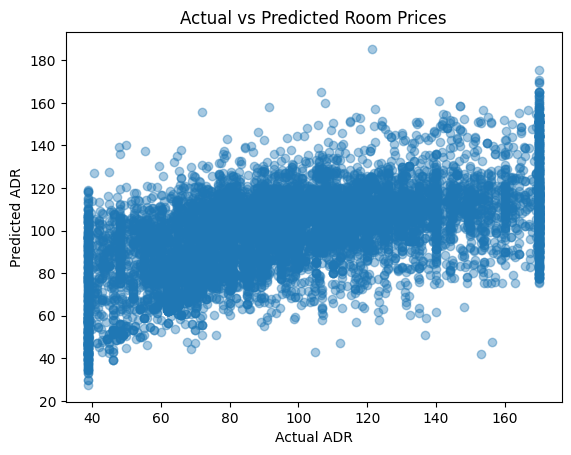

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Actual ADR")
plt.ylabel("Predicted ADR")
plt.title("Actual vs Predicted Room Prices")
plt.show()

In [ ]:
import joblib
joblib.dump(encoder, 'price_encoder.joblib')



['price_encoder.joblib']

Now that the model is trained, you can use it to make predictions on new data. Here's how you can predict the `adr` for the test set:

In [ ]:
NUMERICAL_FEATURES=['hotel', 'lead_time', 'stays_in_week_nights', 'stays_in_weekend_nights',
    'adults', 'children', 'babies', 'meal', 'market_segment',
    'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
    'booking_changes', 'required_car_parking_spaces', 'total_of_special_requests'
]


print("--- Categorical Inputs (String) ---")

meal = input("2. Meal Type (e.g., BB, HB, SC, FB): ")
market_segment = input("3. Market Segment (e.g., Online TA, Groups, Direct): ")
distribution_channel = input("4. Distribution Channel (e.g., TA/TO, Corporate): ")

print("\n--- Numerical/Count Inputs (Integers) ---")

lead_time = int(input("5. Lead Time (days, e.g., 60): "))
stays_in_week_nights = int(input("6. Stays in Week Nights (e.g., 2): "))
stays_in_weekend_nights = int(input("7. Stays in Weekend Nights (e.g., 0): "))
adults = int(input("8. Number of Adults (e.g., 2): "))
children = int(input("9. Number of Children (e.g., 0): "))
babies = int(input("10. Number of Babies (e.g., 0): "))
is_repeated_guest = int(input("11. Is Repeated Guest (0 or 1): "))
previous_cancellations = int(input("12. Previous Cancellations (e.g., 0): "))
booking_changes = int(input("13. Booking Changes (e.g., 0): "))
required_car_parking_spaces = int(input("14. Required Car Parking Spaces (e.g., 0): "))
total_of_special_requests = int(input("15. Total of Special Requests (e.g., 0): "))

print("\n--- Input Collection Complete ---")
# All 15 variables are now defined and ready for use in a model.

--- Categorical Inputs (String) ---
2. Meal Type (e.g., BB, HB, SC, FB): bb
3. Market Segment (e.g., Online TA, Groups, Direct): direct
4. Distribution Channel (e.g., TA/TO, Corporate): corporate

--- Numerical/Count Inputs (Integers) ---
5. Lead Time (days, e.g., 60): 3
6. Stays in Week Nights (e.g., 2): 3
7. Stays in Weekend Nights (e.g., 0): 2
8. Number of Adults (e.g., 2): 2
9. Number of Children (e.g., 0): 2
10. Number of Babies (e.g., 0): 2
11. Is Repeated Guest (0 or 1): 2
12. Previous Cancellations (e.g., 0): 2
13. Booking Changes (e.g., 0): 0
14. Required Car Parking Spaces (e.g., 0): 3
15. Total of Special Requests (e.g., 0): 0

--- Input Collection Complete ---


In [ ]:
data = {
    'hotel': ["Resort Hotel"],
    'lead_time': [lead_time],
    'stays_in_week_nights': [stays_in_week_nights],
    'stays_in_weekend_nights': [stays_in_weekend_nights],
    'adults': [adults],
    'children': [children],
    'babies': [babies],
    'meal': [meal],
    'market_segment': [market_segment],
    'distribution_channel': [distribution_channel],
    'is_repeated_guest': [is_repeated_guest],
    'previous_cancellations': [previous_cancellations],
    'booking_changes': [booking_changes],
    'required_car_parking_spaces': [required_car_parking_spaces],
    'total_of_special_requests': [total_of_special_requests],
}


user_input_df = pd.DataFrame(data)

In [ ]:
NUMERICAL_FEATURES=["lead_time","stays_in_week_nights","stays_in_weekend_nights","adults","Children","babies","market_segment","distribution_channel","is_reapeated_guest","previous_cancellations","booking_changes","required_car_parking_spaces","total_of_special_requests"]

In [ ]:
CATEGORICAL_FEATURES = ["hotel", "meal",'market_segment', 'distribution_channel' ]

In [ ]:

for col in CATEGORICAL_FEATURES:
  user_input_df[col]=encoder.fit_transform(user_input_df[col])

In [ ]:
for col in NUMERICAL_FEATURES:
  user_input_df[col]=scaler.fit_transform(user_input_df[[col]])

In [ ]:
prediction=xgb_model.predict(user_input_df)

In [ ]:
prediction

array([44.237595], dtype=float32)

In [ ]:
total_nights = stays_in_week_nights + stays_in_weekend_nights

predicted_adr_value = prediction[0]

estimated_total_price = predicted_adr_value * total_nights



In [ ]:

usd_to_inr_exchange_rate = 83.0  # Example: 1 USD = 83.0 INR

predicted_adr_usd = predicted_adr_value

predicted_adr_inr = predicted_adr_usd * usd_to_inr_exchange_rate

estimated_total_price_inr = estimated_total_price * usd_to_inr_exchange_rate

print(f"The predicted ADR in INR is: ₹{predicted_adr_inr:.2f}")
print(f"The estimated total price for the stay in INR is: ₹{estimated_total_price_inr:.2f}")

The predicted ADR in INR is: ₹3671.72
The estimated total price for the stay in INR is: ₹18358.60
